In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error

In [30]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [31]:
df_validation['timestamp'] = pd.to_datetime(df_validation['timestamp'])

In [36]:
df_validation=df_validation.set_index('timestamp')

In [37]:
df_validation = df_validation[~((df_validation['gallons'] < 0) )]

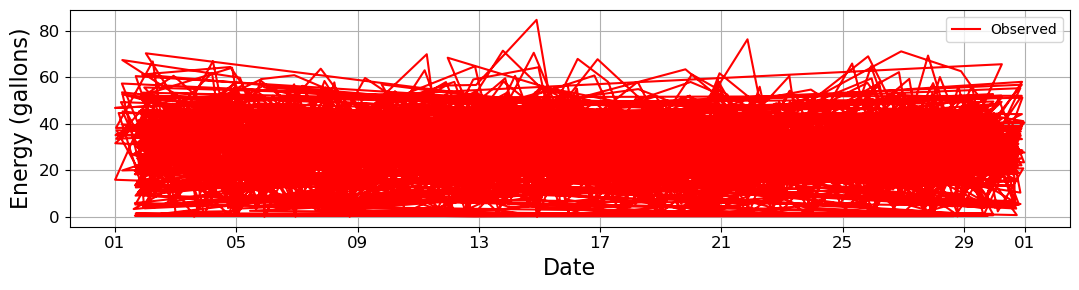

In [38]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_validation.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# Display plot

plt.show() 

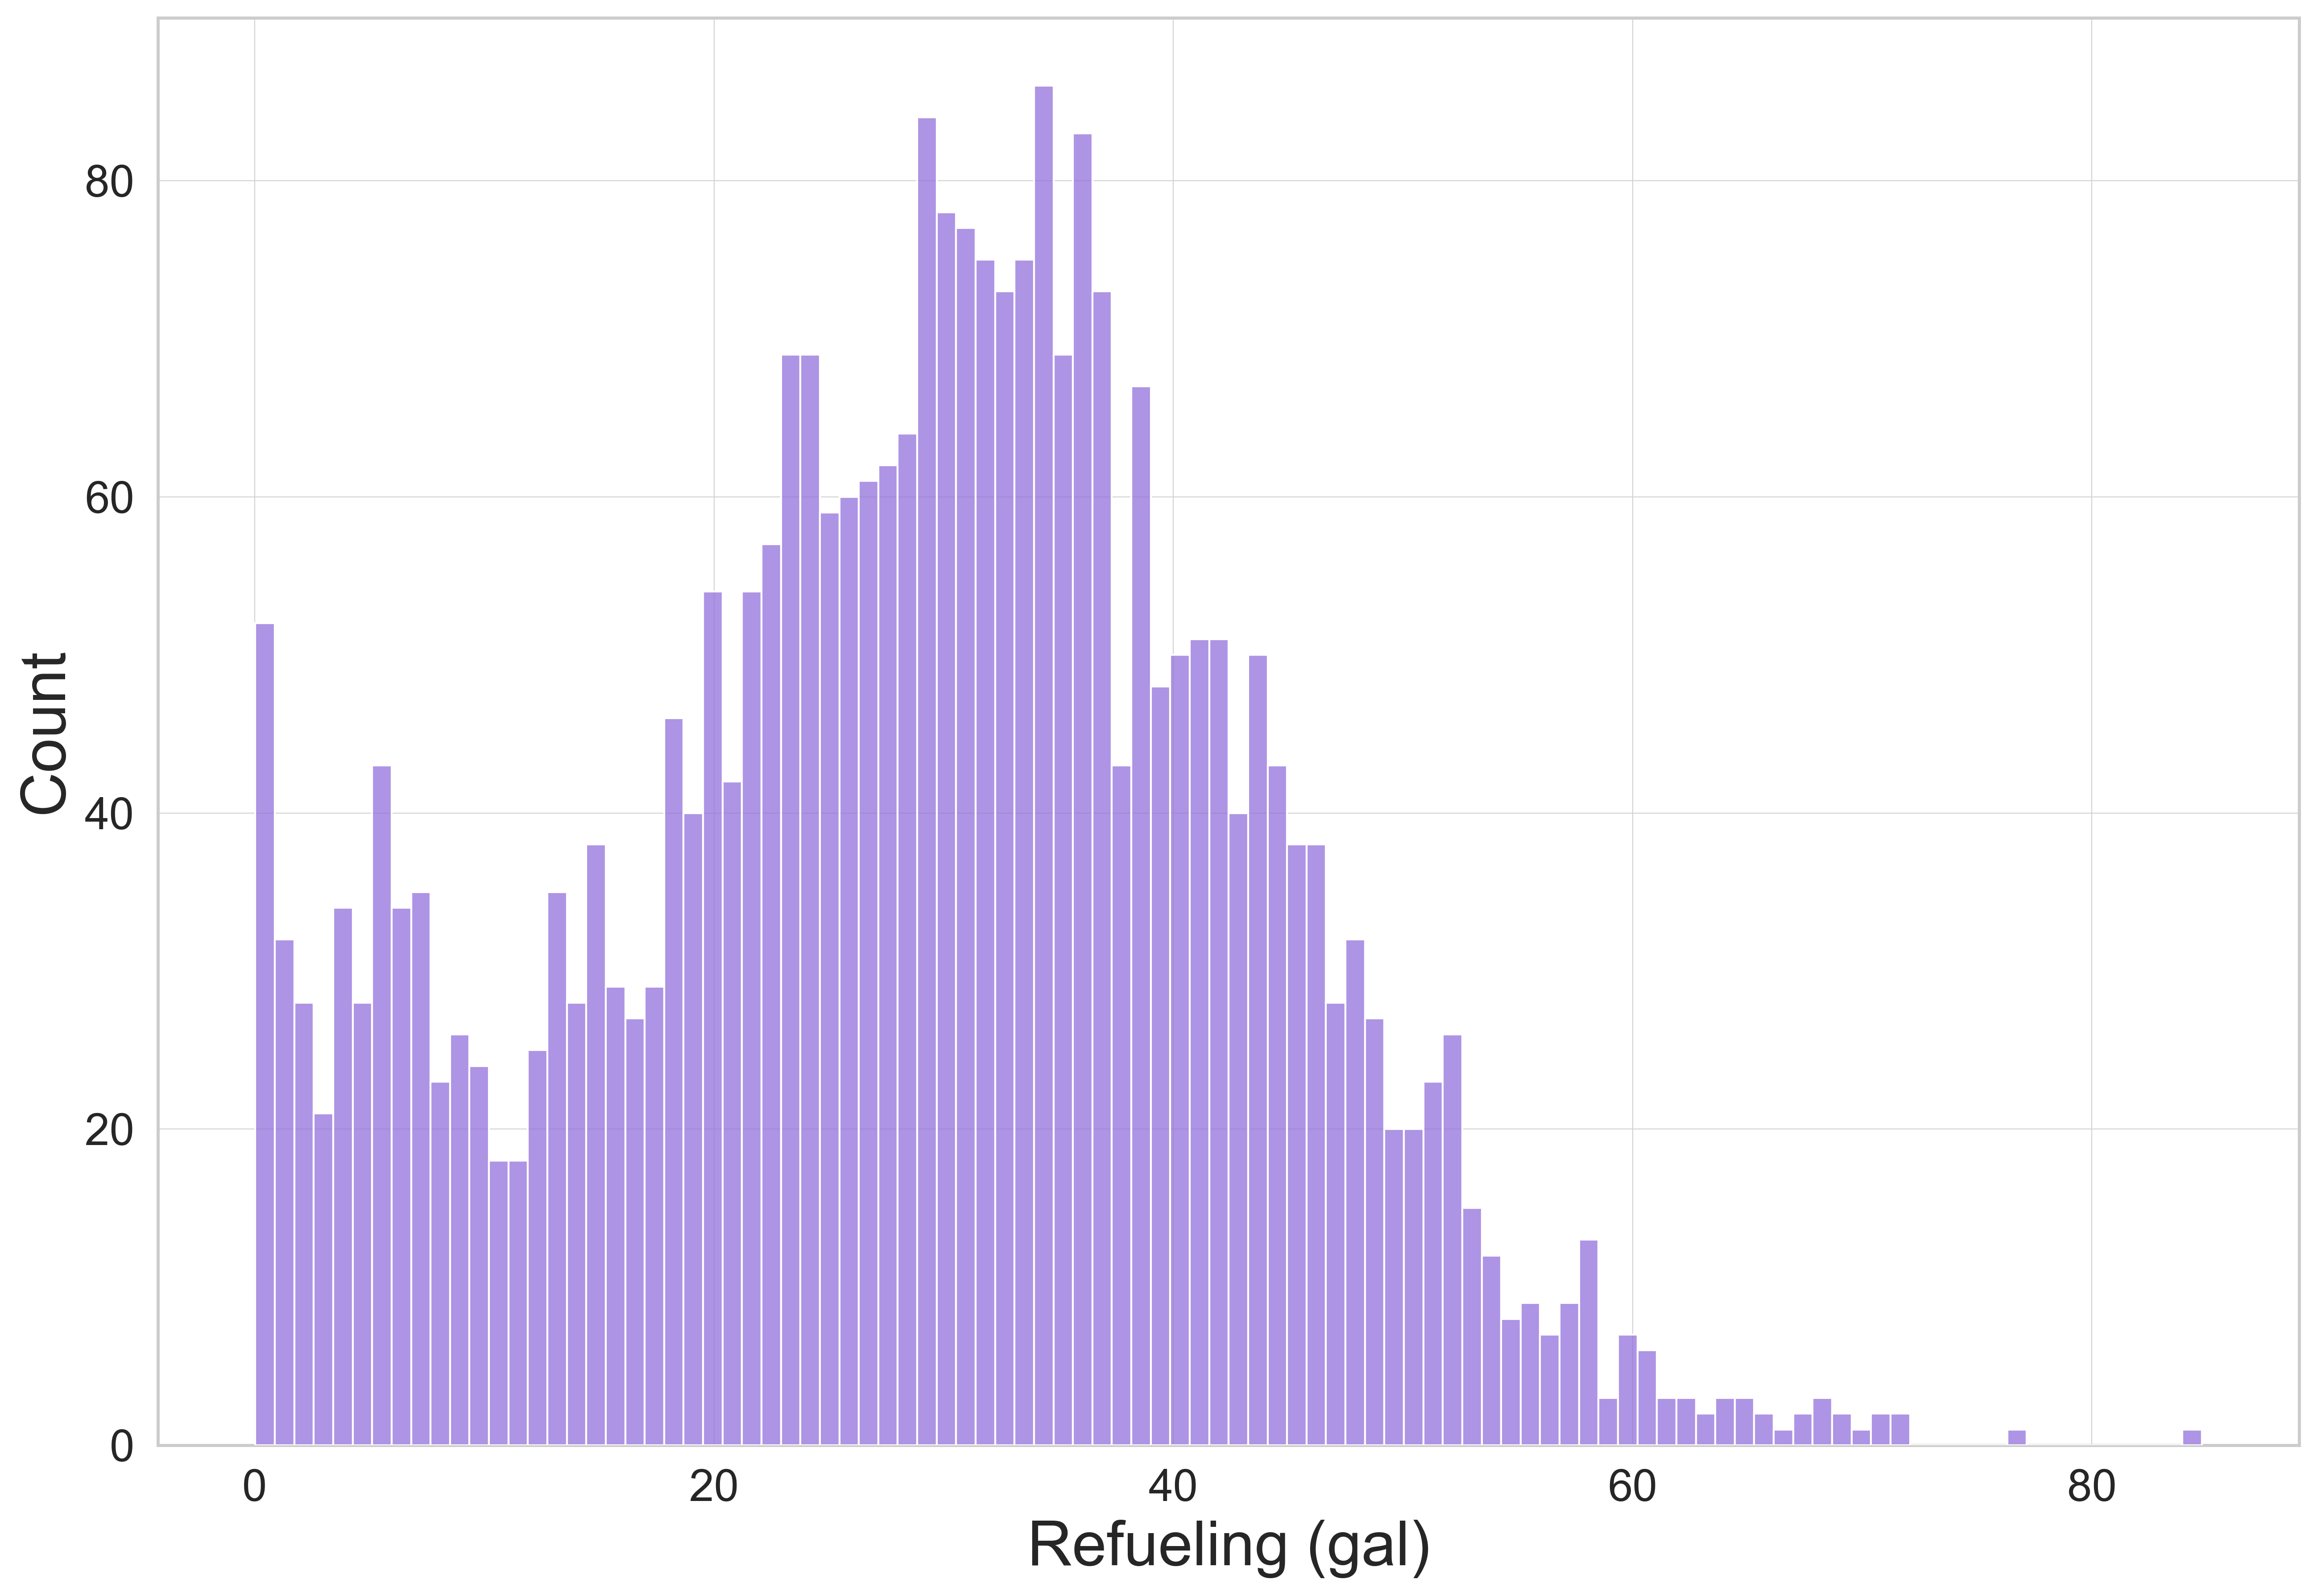

In [40]:
figure(figsize=(15 , 10), dpi=400)

# set style and font size
sns.set(style='whitegrid', font_scale=1.2)

# create histogram with curve
sns.histplot(df_validation['gallons'], 
             bins=100, 
             color='mediumpurple',
             zorder=3)  # use the purple color for the histogram

# set labels and limits
plt.xlabel('Refueling (gal)', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0, 200)

# add gridlines
plt.grid(color='lightgrey', linewidth=0.4)



# adjust size and spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# save figure
#plt.savefig(r'../../figures/hist-fueling-intervals.png', dpi=600, bbox_inches='tight')
plt.show()


In [8]:
selected_date=['4/1/2022','4/2/2022','4/3/2022','4/4/2022','4/5/2022','4/6/2022','4/7/2022','4/8/2022','4/9/2022','4/10/2022','4/11/2022','4/12/2022','4/13/2022','4/14/2022','4/15/2022','4/16/2022','4/17/2022','4/18/2022','4/19/2022','4/20/2022','4/21/2022','4/22/2022','4/23/2022','4/24/2022','4/25/2022','4/26/2022','4/27/2022','4/28/2022','4/29/2022','4/30/2022','4/31/2022']
df_validation=df_validation.loc[df_validation.date.isin(selected_date)]

In [9]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58949,4/1/2022 18:59,3212,10.1,4/1/2022,conventional
1,59065,4/7/2022 1:01,3212,29.3,4/7/2022,conventional
2,59092,4/8/2022 5:33,3212,52.0,4/8/2022,conventional
3,59100,4/8/2022 23:20,3212,25.1,4/8/2022,conventional
4,59125,4/10/2022 5:38,3212,54.1,4/10/2022,conventional
...,...,...,...,...,...,...
2948,4682,4/26/2022 19:12,7816,51.6,4/26/2022,conventional
2949,4683,4/27/2022 20:39,7816,19.3,4/27/2022,conventional
2950,4684,4/28/2022 14:02,7816,14.0,4/28/2022,conventional
2951,4685,4/29/2022 19:10,7816,18.4,4/29/2022,conventional


In [17]:
df_validation = df_validation.groupby('date').agg({'gallons':'sum'})[['gallons']]

In [18]:
df_validation

,gallons
date,
4/1/2022,3727.41
4/10/2022,1003.39
4/11/2022,3237.71
4/12/2022,3450.66
4/13/2022,3371.35
4/14/2022,3595.05
4/15/2022,3375.33
4/16/2022,2441.55
4/17/2022,873.53


In [16]:
df_validation.columns = df_validation.columns.droplevel(1)

IndexError: Too many levels: Index has only 1 level, not 2

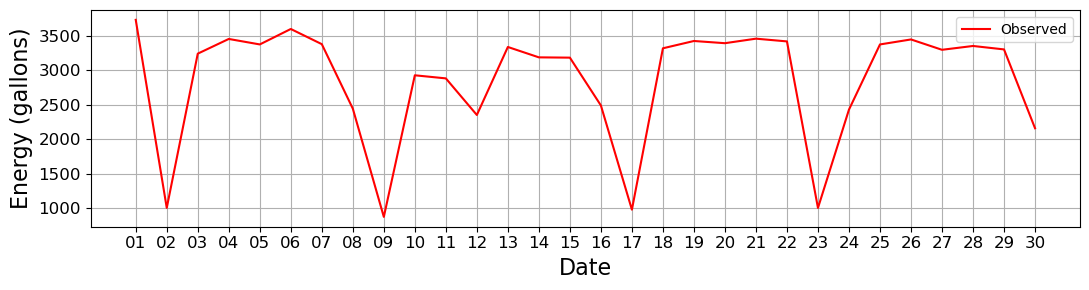

In [19]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_validation.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# Display plot

plt.show() 